it2-2310 38045 Ospan Ramazan 

JAMB - это стандартизированный тест для поступления в университеты Нигерии. Он направлен на выявление факторов, влияющих на успеваемость учащихся, и поддержку разработки целенаправленных мероприятий для улучшения результатов.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
exam_df = pd.read_csv('jamb_exam_results.csv')
exam_df

JAMB_Score  Study_Hours_Per_Week  Attendance_Rate  Teacher_Quality  \
0            192                    22               78                4   
1            207                    14               88                4   
2            182                    29               87                2   
3            210                    29               99                2   
4            199                    12               98                3   
...          ...                   ...              ...              ...   
4995         183                    20               74                2   
4996         179                     0               80                2   
4997         261                    17               89                3   
4998         183                    15               96                2   
4999         218                    34              100                1   

      Distance_To_School School_Type School_Location Extra_Tutorials  \
0                   12.4      Public           Urban             Yes   
1                    2.7      Public           Rural              No   
2                    9.6      Public           Rural             Yes   
3                    2.6      Public           Urban              No   
4                    8.8      Public           Urban              No   
...                  ...         ...             ...             ...   
4995                10.6      Public           Urban             Yes   
4996                20.0      Public           Rural              No   
4997                11.3      Public           Urban              No   
4998                15.9      Public           Rural              No   
4999                 7.0      Public           Urban             Yes   

     Access_To_Learning_Materials Parent_Involvement IT_Knowledge  Student_ID  \
0                             Yes               High       Medium           1   
1                             Yes               High         High           2   
2                             Yes               High       Medium           3   
3                             Yes             Medium         High           4   
4                             Yes             Medium       Medium           5   
...                           ...                ...          ...         ...   
4995                           No                Low          Low        4996   
4996                          Yes             Medium       Medium        4997   
4997                           No                Low         High        4998   
4998                           No                Low       Medium        4999   
4999                          Yes             Medium       Medium        5000   

      Age  Gender Socioeconomic_Status Parent_Education_Level  \
0      17    Male                  Low               Tertiary   
1      15    Male                 High                    NaN   
2      20  Female                 High               Tertiary   
3      22  Female               Medium               Tertiary   
4      22  Female               Medium               Tertiary   
...   ...     ...                  ...                    ...   
4995   16    Male               Medium                Primary   
4996   22    Male                  Low              Secondary   
4997   18    Male               Medium                Primary   
4998   18    Male               Medium              Secondary   
4999   16  Female                 High                    NaN   

      Assignments_Completed  
0                         2  
1                         1  
2                         2  
3                         1  
4                         1  
...                     ...  
4995                      2  
4996                      1  
4997                      3  
4998                      1  
4999                      2  

[5000 rows x 17 columns]

In [5]:
exam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 13  Gen

In [12]:
print(exam_df.columns) # вывел для определения точных названий столбцов

Index(['JAMB_Score', 'Study_Hours_Per_Week', 'Attendance_Rate',
       'Teacher_Quality', 'Distance_To_School', 'School_Type',
       'School_Location', 'Extra_Tutorials', 'Access_To_Learning_Materials',
       'Parent_Involvement', 'IT_Knowledge', 'Student_ID', 'Age', 'Gender',
       'Socioeconomic_Status', 'Parent_Education_Level',
       'Assignments_Completed'],
      dtype='object')


In [6]:
exam_df.describe()

JAMB_Score  Study_Hours_Per_Week  Attendance_Rate  Teacher_Quality  \
count  5000.000000           5000.000000      5000.000000      5000.000000   
mean    174.074600             19.521200        84.235200         2.521400   
std      47.616477              9.634569         9.485688         0.985564   
min     100.000000              0.000000        50.000000         1.000000   
25%     135.000000             13.000000        78.000000         2.000000   
50%     170.000000             19.000000        84.000000         2.000000   
75%     209.000000             26.000000        91.000000         3.000000   
max     367.000000             40.000000       100.000000         5.000000   

       Distance_To_School   Student_ID          Age  Assignments_Completed  
count         5000.000000  5000.000000  5000.000000            5000.000000  
mean            10.005460  2500.500000    18.445800               1.804600  
std              4.820221  1443.520003     2.301504               0.992076  
min              0.000000     1.000000    15.000000               1.000000  
25%              6.600000  1250.750000    16.000000               1.000000  
50%             10.000000  2500.500000    18.000000               1.000000  
75%             13.400000  3750.250000    20.000000               2.000000  
max             20.000000  5000.000000    22.000000               5.000000

прежде чем прибегнуть к анализу данных, проверим насколько они качественные. В результате можем видеть что они вполне подходят, за исключением уровня образование родителей, но думаю оно нам не помешает (насчет того почему так случилось, возможно это следствие того что во время учебы родителей не было закрепленной системы и четкого сбора данных)

In [99]:
exam_df.isnull().sum()

JAMB_Score                        0
Study_Hours_Per_Week              0
Attendance_Rate                   0
Teacher_Quality                   0
Distance_To_School                0
School_Type                       0
School_Location                   0
Extra_Tutorials                   0
Access_To_Learning_Materials      0
Parent_Involvement                0
IT_Knowledge                      0
Student_ID                        0
Age                               0
Gender                            0
Socioeconomic_Status              0
Parent_Education_Level          891
Assignments_Completed             0
dtype: int64

**хотя передумал, уберу пустые значения!**

In [100]:
exam_df = exam_df.loc[exam_df['Parent_Education_Level'].notna()]
exam_df

JAMB_Score  Study_Hours_Per_Week  Attendance_Rate  Teacher_Quality  \
0            192                    22               78                4   
2            182                    29               87                2   
3            210                    29               99                2   
4            199                    12               98                3   
5            202                    25               85                2   
...          ...                   ...              ...              ...   
4994         233                    19               81                3   
4995         183                    20               74                2   
4996         179                     0               80                2   
4997         261                    17               89                3   
4998         183                    15               96                2   

      Distance_To_School School_Type School_Location Extra_Tutorials  \
0                   12.4      Public           Urban             Yes   
2                    9.6      Public           Rural             Yes   
3                    2.6      Public           Urban              No   
4                    8.8      Public           Urban              No   
5                   13.6      Public           Urban             Yes   
...                  ...         ...             ...             ...   
4994                 7.8      Public           Urban             Yes   
4995                10.6      Public           Urban             Yes   
4996                20.0      Public           Rural              No   
4997                11.3      Public           Urban              No   
4998                15.9      Public           Rural              No   

     Access_To_Learning_Materials Parent_Involvement IT_Knowledge  Student_ID  \
0                             Yes               High       Medium           1   
2                             Yes               High       Medium           3   
3                             Yes             Medium         High           4   
4                             Yes             Medium       Medium           5   
5                              No             Medium          Low           6   
...                           ...                ...          ...         ...   
4994                           No                Low          Low        4995   
4995                           No                Low          Low        4996   
4996                          Yes             Medium       Medium        4997   
4997                           No                Low         High        4998   
4998                           No                Low       Medium        4999   

      Age  Gender Socioeconomic_Status Parent_Education_Level  \
0      17    Male                  Low               Tertiary   
2      20  Female                 High               Tertiary   
3      22  Female               Medium               Tertiary   
4      22  Female               Medium               Tertiary   
5      15    Male                  Low               Tertiary   
...   ...     ...                  ...                    ...   
4994   22    Male               Medium              Secondary   
4995   16    Male               Medium                Primary   
4996   22    Male                  Low              Secondary   
4997   18    Male               Medium                Primary   
4998   18    Male               Medium              Secondary   

      Assignments_Completed  
0                         2  
2                         2  
3                         1  
4                         1  
5                         1  
...                     ...  
4994                      1  
4995                      2  
4996                      1  
4997                      3  
4998                      1  

[4109 rows x 17 columns]

In [101]:
exam_df.rename(columns = {'Study_Hours_Per_Week' : 'studyHPerWeek', 'JAMB_Score' : 'jumbScore'}, inplace = True)
exam_df

<ipython-input-101-82743520edb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exam_df.rename(columns = {'Study_Hours_Per_Week' : 'studyHPerWeek', 'JAMB_Score' : 'jumbScore'}, inplace = True)


jumbScore  studyHPerWeek  Attendance_Rate  Teacher_Quality  \
0           192             22               78                4   
2           182             29               87                2   
3           210             29               99                2   
4           199             12               98                3   
5           202             25               85                2   
...         ...            ...              ...              ...   
4994        233             19               81                3   
4995        183             20               74                2   
4996        179              0               80                2   
4997        261             17               89                3   
4998        183             15               96                2   

      Distance_To_School School_Type School_Location Extra_Tutorials  \
0                   12.4      Public           Urban             Yes   
2                    9.6      Public           Rural             Yes   
3                    2.6      Public           Urban              No   
4                    8.8      Public           Urban              No   
5                   13.6      Public           Urban             Yes   
...                  ...         ...             ...             ...   
4994                 7.8      Public           Urban             Yes   
4995                10.6      Public           Urban             Yes   
4996                20.0      Public           Rural              No   
4997                11.3      Public           Urban              No   
4998                15.9      Public           Rural              No   

     Access_To_Learning_Materials Parent_Involvement IT_Knowledge  Student_ID  \
0                             Yes               High       Medium           1   
2                             Yes               High       Medium           3   
3                             Yes             Medium         High           4   
4                             Yes             Medium       Medium           5   
5                              No             Medium          Low           6   
...                           ...                ...          ...         ...   
4994                           No                Low          Low        4995   
4995                           No                Low          Low        4996   
4996                          Yes             Medium       Medium        4997   
4997                           No                Low         High        4998   
4998                           No                Low       Medium        4999   

      Age  Gender Socioeconomic_Status Parent_Education_Level  \
0      17    Male                  Low               Tertiary   
2      20  Female                 High               Tertiary   
3      22  Female               Medium               Tertiary   
4      22  Female               Medium               Tertiary   
5      15    Male                  Low               Tertiary   
...   ...     ...                  ...                    ...   
4994   22    Male               Medium              Secondary   
4995   16    Male               Medium                Primary   
4996   22    Male                  Low              Secondary   
4997   18    Male               Medium                Primary   
4998   18    Male               Medium              Secondary   

      Assignments_Completed  
0                         2  
2                         2  
3                         1  
4                         1  
5                         1  
...                     ...  
4994                      1  
4995                      2  
4996                      1  
4997                      3  
4998                      1  

[4109 rows x 17 columns]

**переименовал дабы избавиться от ошибки**

ValueError: Could not interpret value `JAMB Score` for `y`. An entry with this name does not appear in `data`.

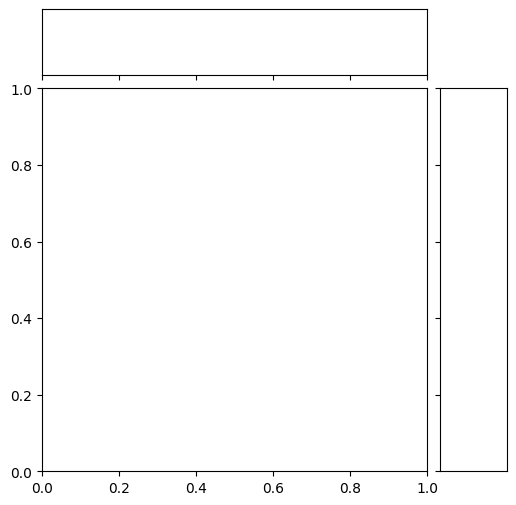

In [11]:
#влияет ли время, проведённое на учёбу, на результаты экзамена
sns.jointplot(x='Study_Hours_Per_Week', y='JAMB_Score', data = exam_df, alpha=0.5)

*Из диаграммы ясно что, большинсто студентов уделяли подготовке 20 - 25 часов в неделю, и если оттолкнуться от диаграммы итоговых баллов, можно сделать вывод что этого количество часов словно не достаточно, поскольку львиная доля обучающихся набрали от силы 60 процентов. почему я выбрал именно часы учебы и результаты экзаменов? поскольку мне кажется что это хоть и грубое но достаточно легкое и точное сравнение для выявления статистики, поскольку успеваемость напрямую зависит от того сколько человек занимается этой самой учебой*



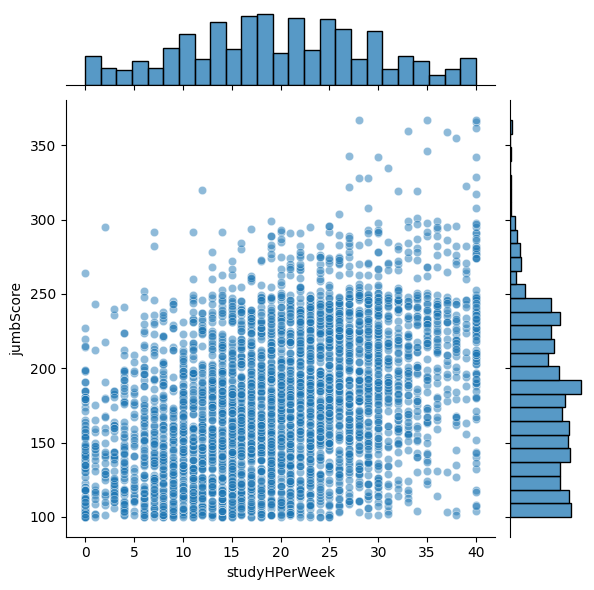

In [55]:
#влияет ли время, проведённое на учёбу, на результаты экзамена
sns.jointplot(x='studyHPerWeek', y='jumbScore', data = exam_df, alpha=0.5)

*сравнение успеваемости по итоговым баллам городских и сельских учащихся*

In [56]:
#разделяем на две группы по местности

urbalStudents_df = exam_df.loc[exam_df['School_Location'] != 'Rural']
ruralStudents_df = exam_df.loc[exam_df['School_Location'] != 'Urban']

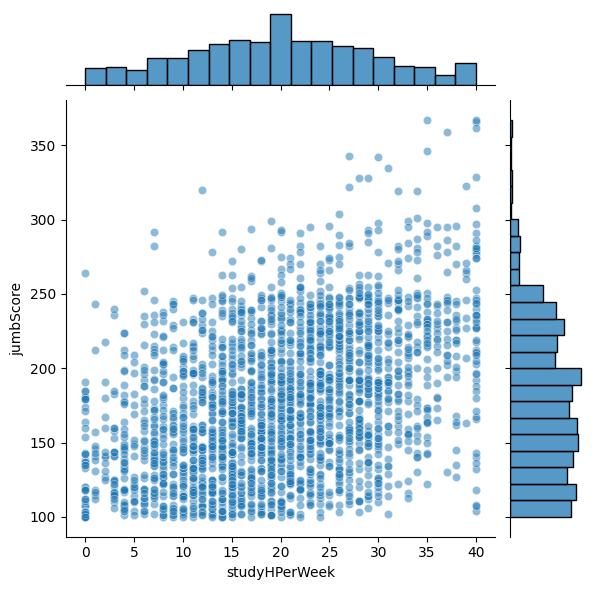

In [57]:
sns.jointplot(x='studyHPerWeek', y='jumbScore', data=urbalStudents_df, alpha=0.5)
plt.show()

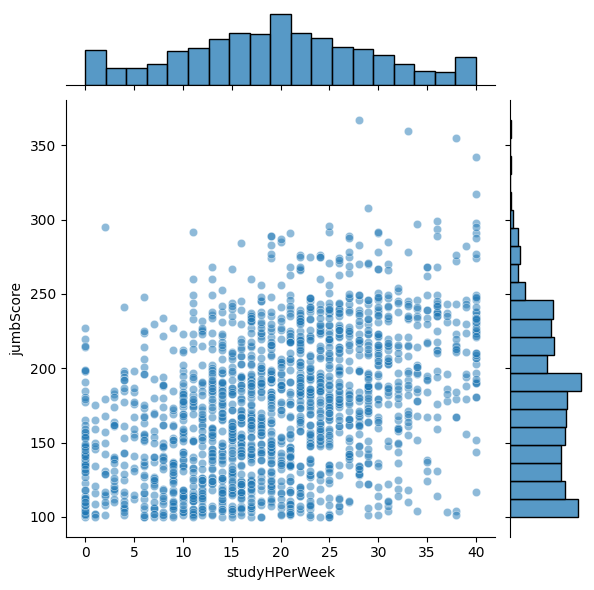

In [58]:
sns.jointplot(x='studyHPerWeek', y='jumbScore', data=ruralStudents_df, alpha=0.5)
plt.show()

*Честно признать, был удивлен показателями графиков, при сухом сравнении визуально видно что "rural" сельские учащиеся самую малость обходят по усердности обучающихся, думаю это связанно с более меньших количеством альтернатив для развития нежели у городских. Но при этом на удивление у них оценка за экзамен по статистике в более плохом состоянии, возможно в связи с тем что в сельских школах качество преподавание может заметно сниженна*

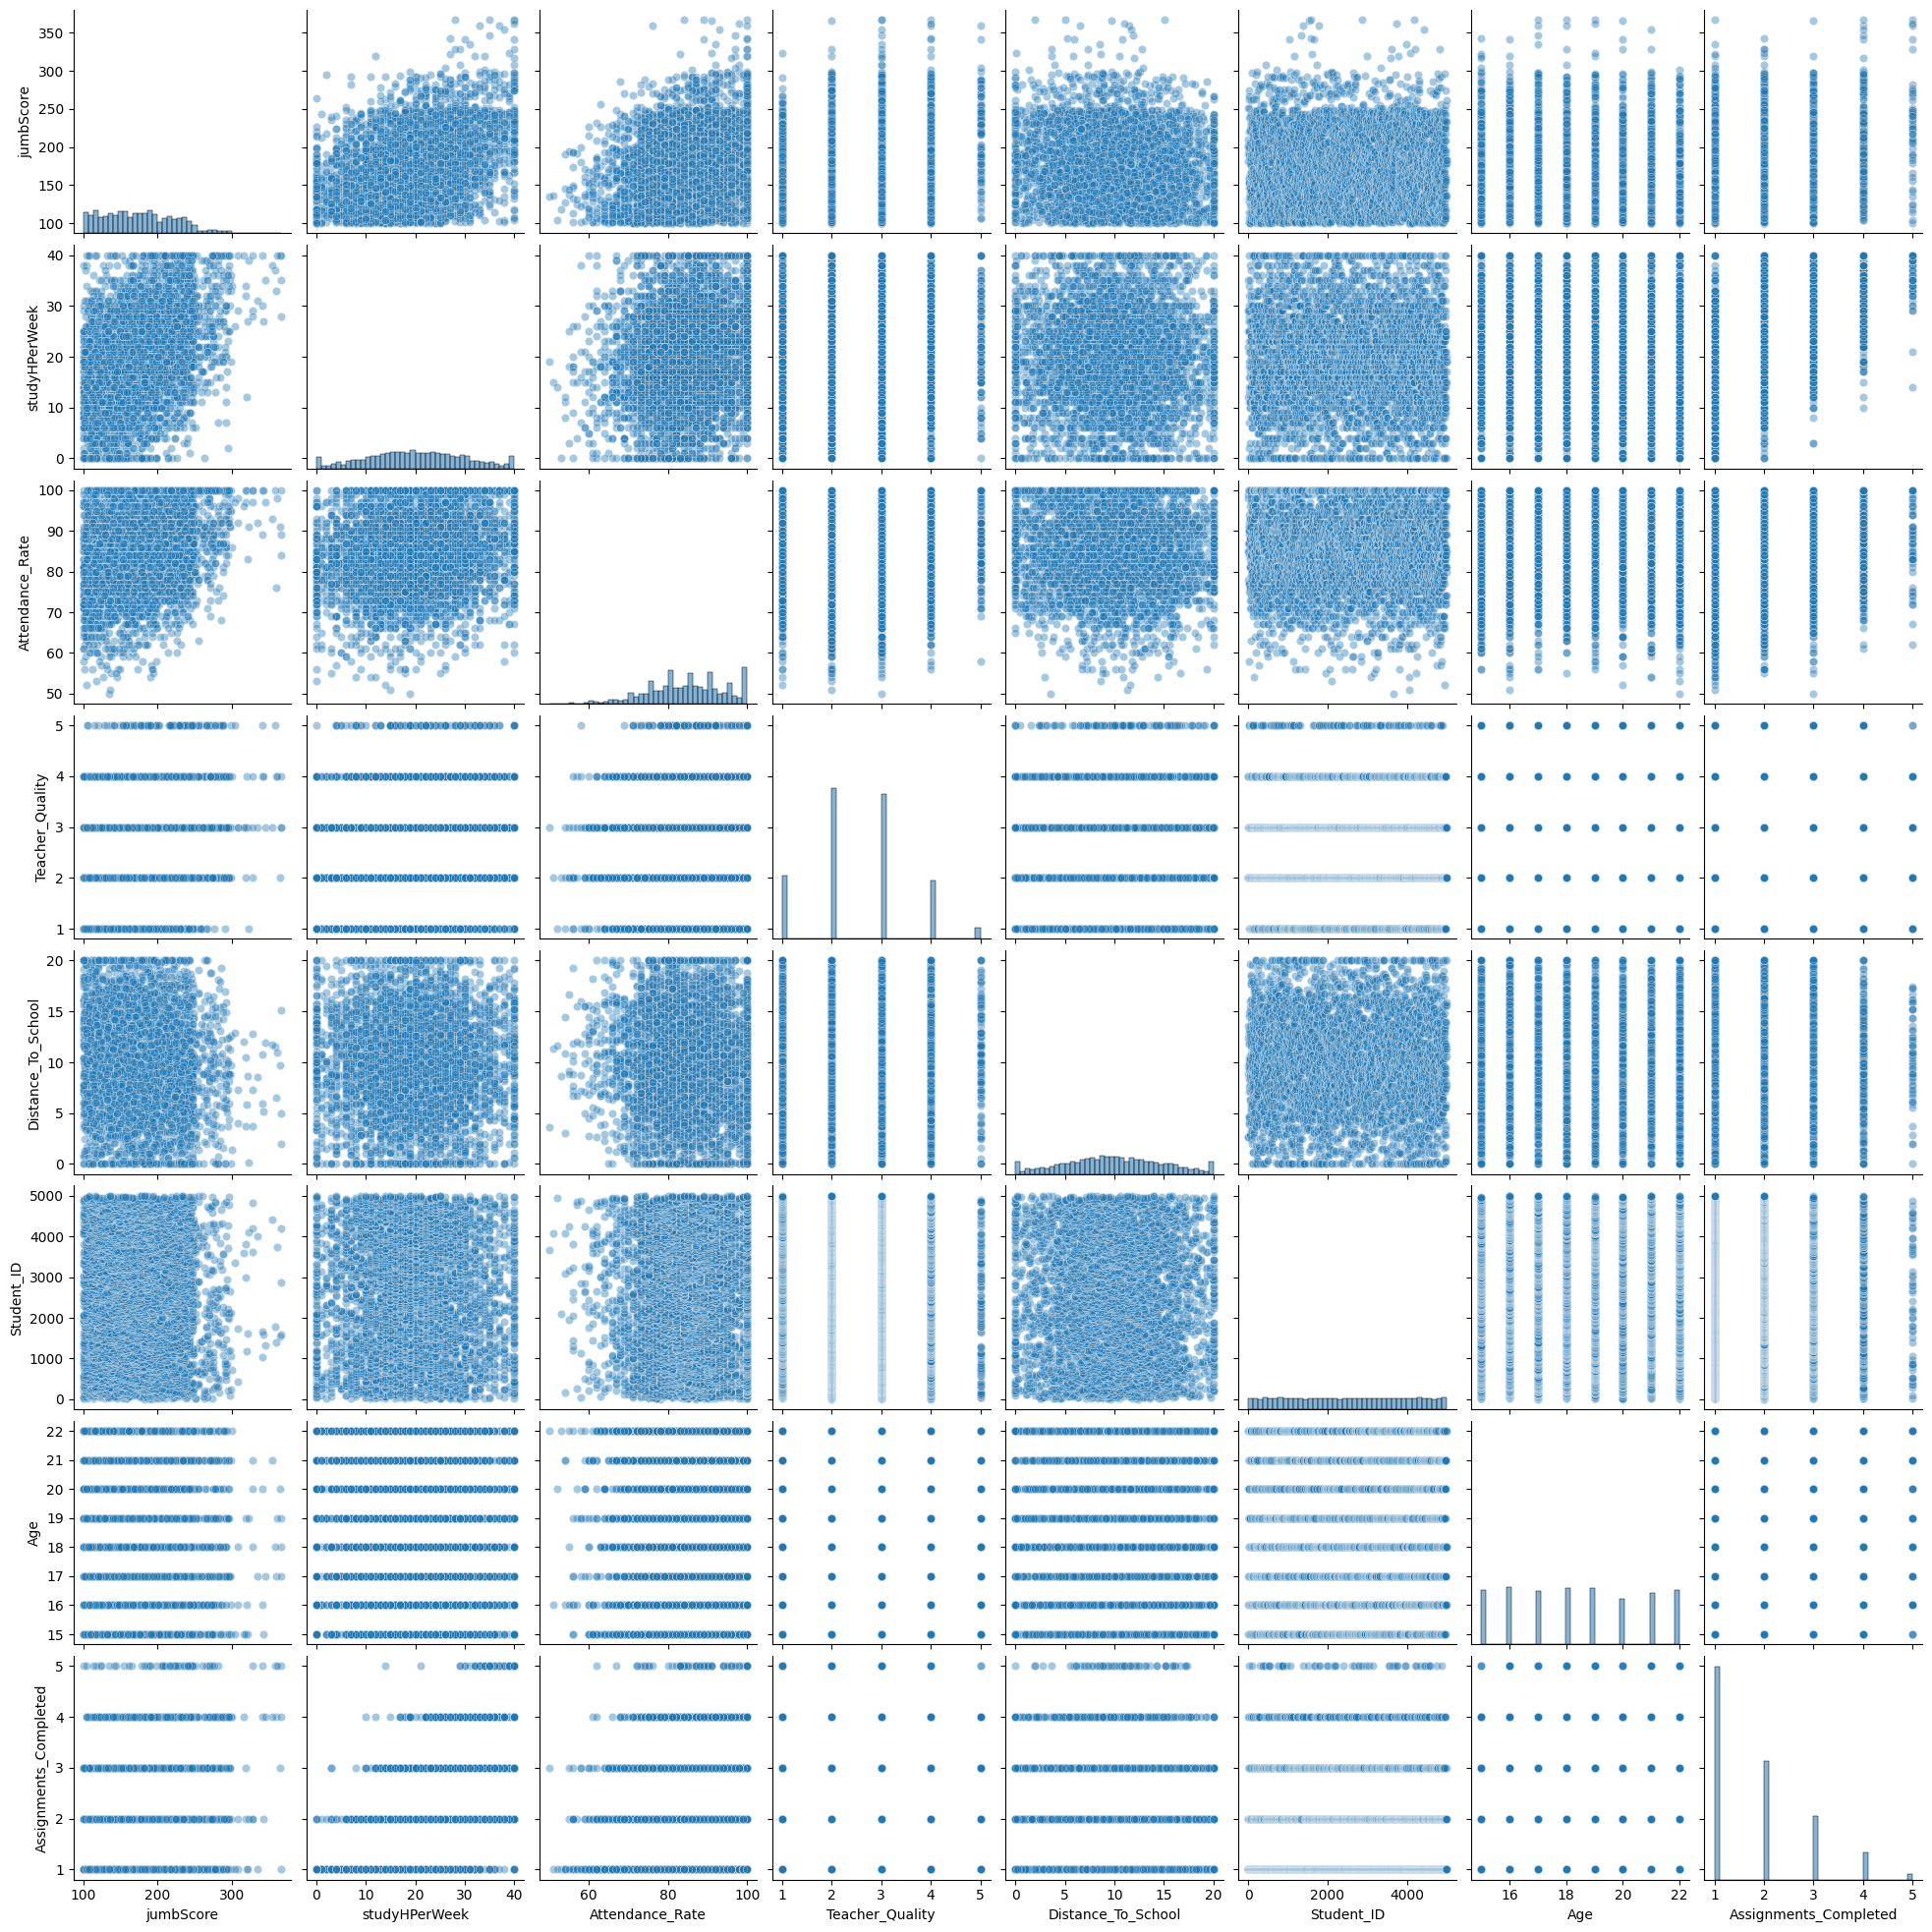

In [59]:
sns.pairplot(exam_df,
             kind='scatter',
             plot_kws={'alpha':0.4},
             diag_kws={'alpha':0.55, 'bins':40})

использовал 'Pairplot', данный метод считается достаточно мощным и многомерным, позволяет значительно упростить визуализацию множественных взяимосвязанных данных без необходимости создавать несколько вариаций одного кода, на что я прибегнул в прошлом примере

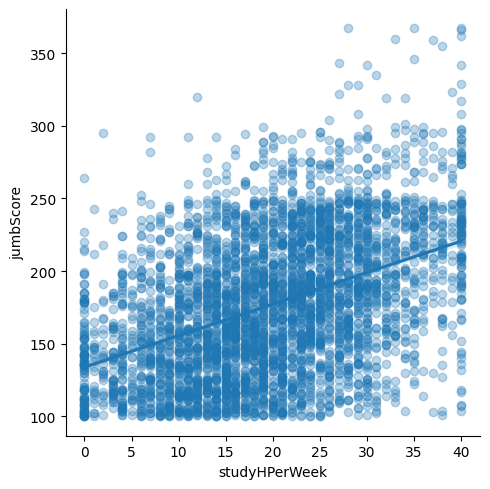

In [60]:

sns.lmplot(x='studyHPerWeek',
           y='jumbScore',
           data=exam_df,
           scatter_kws={'alpha':0.3})

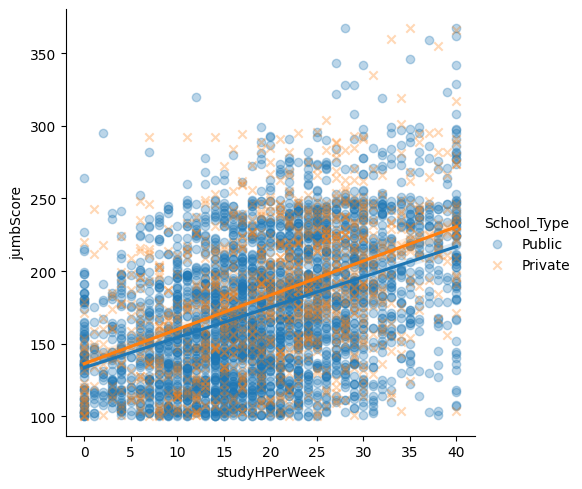

In [63]:
sns.lmplot(x='studyHPerWeek',
           y='jumbScore',
           data=exam_df,
           hue='School_Type',
           markers=['o', 'x'],
           scatter_kws={'alpha':0.3})


*на данной чуть более модифицированной версии lmplot, могу сказать что уровень образования у учащихся в частных и общеобразовательных был на уровне погрешности*

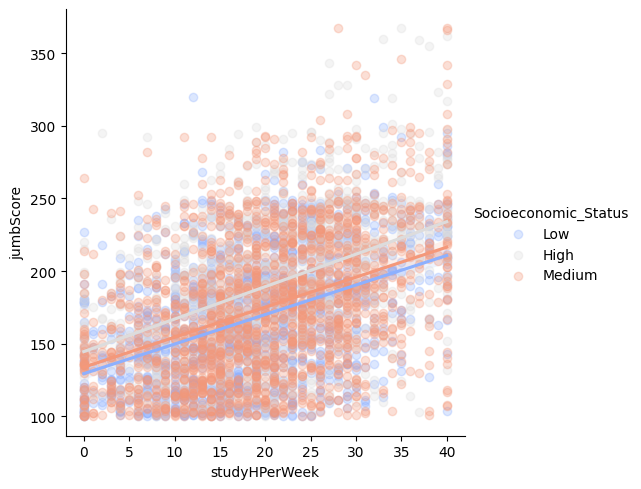

In [64]:
sns.lmplot(x='studyHPerWeek',
           y='jumbScore',
           data=exam_df,
           hue='Socioeconomic_Status',
           palette='coolwarm',
           scatter_kws={'alpha':0.3})


## Splitting the data

 *x это предтикторы, y это входные данные. Мы создаем модель которая получает X и будет предсказывать дальнейшее поведение Y при помощи линейной регрессии.*

In [66]:
from sklearn.model_selection import train_test_split as tts

In [67]:
exam_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4109 entries, 0 to 4998
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jumbScore                     4109 non-null   int64  
 1   studyHPerWeek                 4109 non-null   int64  
 2   Attendance_Rate               4109 non-null   int64  
 3   Teacher_Quality               4109 non-null   int64  
 4   Distance_To_School            4109 non-null   float64
 5   School_Type                   4109 non-null   object 
 6   School_Location               4109 non-null   object 
 7   Extra_Tutorials               4109 non-null   object 
 8   Access_To_Learning_Materials  4109 non-null   object 
 9   Parent_Involvement            4109 non-null   object 
 10  IT_Knowledge                  4109 non-null   object 
 11  Student_ID                    4109 non-null   int64  
 12  Age                           4109 non-null   int64  
 13  Gender  

In [109]:
x = exam_df[['studyHPerWeek', 'Attendance_Rate', 'Teacher_Quality', 'Extra_Tutorials']]
y = exam_df['jumbScore']

In [110]:
x.head()
y.head()

0    192
2    182
3    210
4    199
5    202
Name: jumbScore, dtype: int64

In [111]:
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.3, random_state=42)

*разделение на тестовые подможество по доле, 30 процентов на тест и 70 на обучение.*

## Training the Model with multivariable regression using Scikit Learn

*В этом разделе мы создадим модель и подадим на вход данные для обучения. Эта модель покажет нам, какой входной параметр оказывает наибольшее влияние на результаты экзаменов (JAMB Score). Как показывают диаграммы, мы обнаруживаем, что наиболее значимым коэффициентом является количество часов учёбы в неделю (studyHPerWeek), за которым следует качество преподавателя (Teacher_Quality) и уровень участия родителей (Parent_Involvement). Качество доступа к учебным материалам (Access_To_Learning_Materials) не кажется значительным фактором, влияющим на результаты экзамена*

In [105]:
from sklearn.linear_model import LinearRegression as LR

In [106]:
lm = LR()

In [107]:
exam_df['Extra_Tutorials'] = exam_df['Extra_Tutorials'].map(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else None))
exam_df['Access_To_Learning_Materials'] = exam_df['Access_To_Learning_Materials'].map(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else None))
exam_df

<ipython-input-107-014e10917791>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exam_df['Extra_Tutorials'] = exam_df['Extra_Tutorials'].map(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else None))
<ipython-input-107-014e10917791>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exam_df['Access_To_Learning_Materials'] = exam_df['Access_To_Learning_Materials'].map(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else None))


jumbScore  studyHPerWeek  Attendance_Rate  Teacher_Quality  \
0           192             22               78                4   
2           182             29               87                2   
3           210             29               99                2   
4           199             12               98                3   
5           202             25               85                2   
...         ...            ...              ...              ...   
4994        233             19               81                3   
4995        183             20               74                2   
4996        179              0               80                2   
4997        261             17               89                3   
4998        183             15               96                2   

      Distance_To_School School_Type School_Location  Extra_Tutorials  \
0                   12.4      Public           Urban                1   
2                    9.6      Public           Rural                1   
3                    2.6      Public           Urban                0   
4                    8.8      Public           Urban                0   
5                   13.6      Public           Urban                1   
...                  ...         ...             ...              ...   
4994                 7.8      Public           Urban                1   
4995                10.6      Public           Urban                1   
4996                20.0      Public           Rural                0   
4997                11.3      Public           Urban                0   
4998                15.9      Public           Rural                0   

      Access_To_Learning_Materials Parent_Involvement IT_Knowledge  \
0                                1               High       Medium   
2                                1               High       Medium   
3                                1             Medium         High   
4                                1             Medium       Medium   
5                                0             Medium          Low   
...                            ...                ...          ...   
4994                             0                Low          Low   
4995                             0                Low          Low   
4996                             1             Medium       Medium   
4997                             0                Low         High   
4998                             0                Low       Medium   

      Student_ID  Age  Gender Socioeconomic_Status Parent_Education_Level  \
0              1   17    Male                  Low               Tertiary   
2              3   20  Female                 High               Tertiary   
3              4   22  Female               Medium               Tertiary   
4              5   22  Female               Medium               Tertiary   
5              6   15    Male                  Low               Tertiary   
...          ...  ...     ...                  ...                    ...   
4994        4995   22    Male               Medium              Secondary   
4995        4996   16    Male               Medium                Primary   
4996        4997   22    Male                  Low              Secondary   
4997        4998   18    Male               Medium                Primary   
4998        4999   18    Male               Medium              Secondary   

      Assignments_Completed  
0                         2  
2                         2  
3                         1  
4                         1  
5                         1  
...                     ...  
4994                      1  
4995                      2  
4996                      1  
4997                      3  
4998                      1  

[4109 rows x 17 columns]

In [112]:
lm.fit(x_train, y_train)

LinearRegression()

In [113]:
lm.coef_

array([ 1.88282381,  1.09450084, 11.94706699,  5.23357606])

*studyHPerWeek: 1.88 — Этот коэффициент показывает, что с увеличением времени, затрачиваемого на учебу в неделю, результаты экзаменов (JAMB Score) также увеличиваются.
Attendance_Rate: 1.09 — Регулярное посещение занятий оказывает положительное влияние на результаты.
Teacher_Quality: 11.95 — Качество преподавания оказывает значительное влияние на успеваемость.
Extra_Tutorials: 5.23 — Дополнительные занятия также положительно сказываются на результатах экзаменов.*

In [114]:
lm.score(x, y)

0.29234175112529937

*R² равно приблизительно 0.292, что означает, что ваша модель объясняет около 29.2% вариации результата на экзамене на основе ваших независимых переменных (часы учебы в неделю, уровень посещаемости, качество преподавания и т.д.).*

In [116]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['Coef'])
print(cdf)

                      Coef
studyHPerWeek     1.882824
Attendance_Rate   1.094501
Teacher_Quality  11.947067
Extra_Tutorials   5.233576


## Training the model with multivariable regression using OLS
*Позволяет нам получить более подробную информацию о модели*

In [118]:
import statsmodels.api as sm

In [121]:
x = sm.add_constant(x_train)
model = sm.OLS(y_train, x)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              jumbScore   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     299.7
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          1.29e-215
Time:                        20:05:13   Log-Likelihood:                -14764.
No. Observations:                2876   AIC:                         2.954e+04
Df Residuals:                    2871   BIC:                         2.957e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.7468      7.075     

## Predicting Test Data
*Теперь, когда модель обучена, мы сможем использовать ее для составления прогнозов и оценки нашей модели. На точечной диаграмме ниже показаны фактические значения, соответствующие прогнозам модели. Кажется, что модель работает точно.*

In [123]:
predictions = lm.predict(x_test)

Text(0.5, 1.0, 'результаты экзамена')

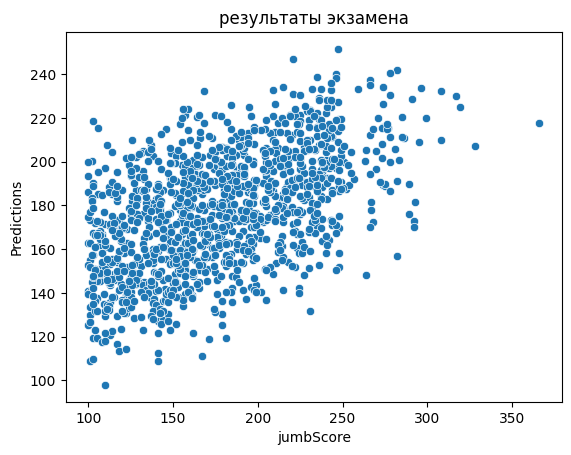

In [127]:
sns.scatterplot(x=y_test, y=predictions)
plt.ylabel('Predictions')
plt.title('результаты экзамена')

## Evaluation of the model

In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [129]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 32.175059010328305
Mean Squared Error: 1606.0758709368122
Root Mean Squared Error: 40.07587642131875


*MAE равно 32.17, что означает, что в среднем предсказания модели отклоняются от фактических результатов на 32.17 баллов.*

*RMSE то среднее значение квадратов ошибок. MSE усиливает влияние больших ошибок, что делает его полезным, если большие ошибки нежелательны, в нашем случае 1606.08.*

*RMSE это квадратный корень из MSE. RMSE в масштабе исходных данных и часто интерпретируется легче, чем MSE. RMSE в вашем случае равен 40.09, что также показывает, насколько в среднем предсказания модели отклоняются от фактических значений.*

## Residuals
*График распределения остатков от предсказаний модели. Они должны быть нормально распределены*

<ipython-input-130-b87d825c292e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)


<Axes: xlabel='jumbScore', ylabel='Density'>

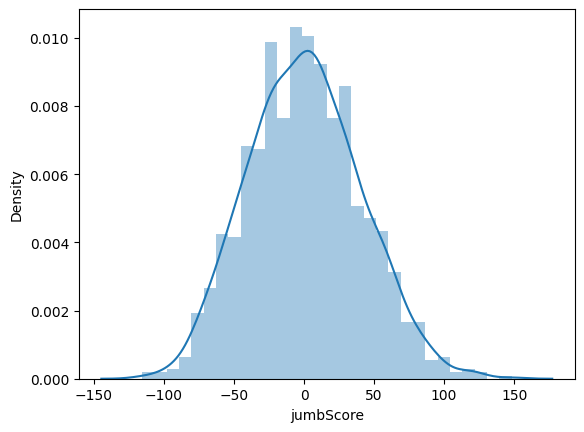

In [130]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)

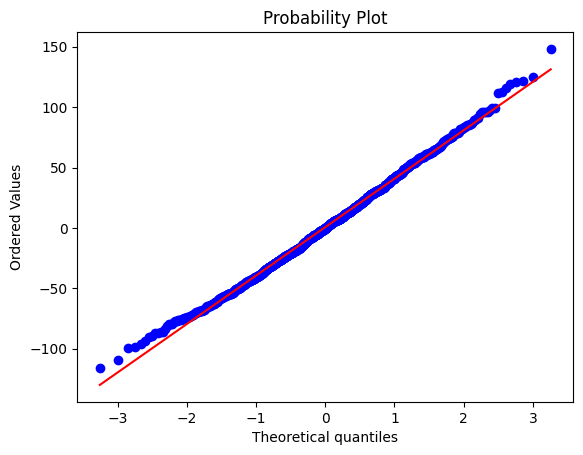

In [131]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

## Conclusion
*Интерпретировать результаты, полученные в ходе этого анализа, может быть сложно. Согласно модели, наиболее значимым фактором для предсказания результатов экзамена оказалось количество часов учебы в неделю, что указывает на прямую связь между усилиями студентов и их успеваемостью. Другие переменные, такие как уровень участия и качество преподавателя, также вносят вклад, но в меньшей степени.*

*Мы можем интерпретировать это несколькими способами. Во-первых, это подтверждает важность регулярной учебы и качественной подготовки к экзаменам. Во-вторых, результаты могут указывать на то, что школы и учебные программы должны больше внимания уделять индивидуальной поддержке учащихся, а также качеству преподавания. В-третьих, учитывая разброс в данных, следует провести дополнительные исследования для выявления более детальных закономерностей, которые могут скрываться в данных.*

*Наш анализ и модель предоставляют важную информацию для образовательных учреждений о том, какие факторы наиболее значимы для успеха учащихся на экзаменах. Это, в свою очередь, может помочь улучшить образовательные стратегии и методы преподавания.*